In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 

tf.__version__

'2.20.0'

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [4]:
print(f"Traingsdaten{x_train.shape , y_train.shape}")
print(f"Testdaten{x_test.shape , y_test.shape}")

Traingsdaten((60000, 28, 28), (60000,))
Testdaten((10000, 28, 28), (10000,))


In [5]:
x_train[0][15:25 , 15:25]

array([[186, 253, 253, 150,  27,   0,   0,   0,   0,   0],
       [ 16,  93, 252, 253, 187,   0,   0,   0,   0,   0],
       [  0,   0, 249, 253, 249,  64,   0,   0,   0,   0],
       [130, 183, 253, 253, 207,   2,   0,   0,   0,   0],
       [253, 253, 253, 250, 182,   0,   0,   0,   0,   0],
       [253, 253, 201,  78,   0,   0,   0,   0,   0,   0],
       [198,  81,   2,   0,   0,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [6]:
# X_train & x_test normalisieren 
x_train = x_train / 255
x_test = x_test / 255 

In [7]:
x_train[0][15:25 , 15:25]

array([[0.72941176, 0.99215686, 0.99215686, 0.58823529, 0.10588235,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0627451 , 0.36470588, 0.98823529, 0.99215686, 0.73333333,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.97647059, 0.99215686, 0.97647059,
        0.25098039, 0.        , 0.        , 0.        , 0.        ],
       [0.50980392, 0.71764706, 0.99215686, 0.99215686, 0.81176471,
        0.00784314, 0.        , 0.        , 0.        , 0.        ],
       [0.99215686, 0.99215686, 0.99215686, 0.98039216, 0.71372549,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99215686, 0.99215686, 0.78823529, 0.30588235, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.77647059, 0.31764706, 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.03529412, 0.        , 0.       

In [8]:
print (y_test[0])

7


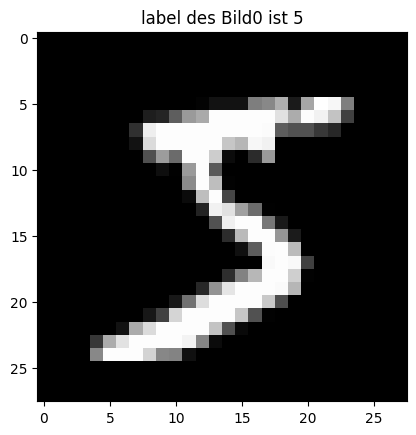

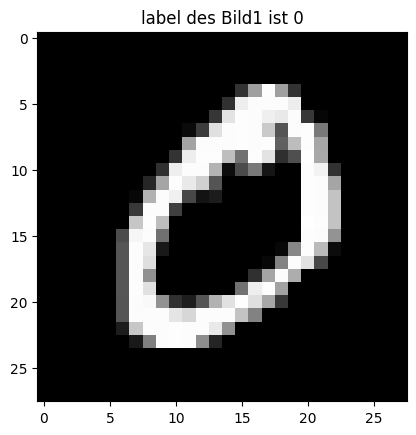

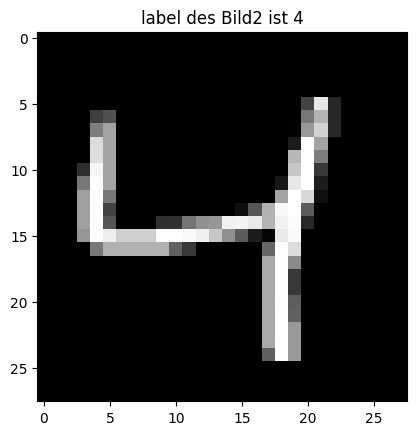

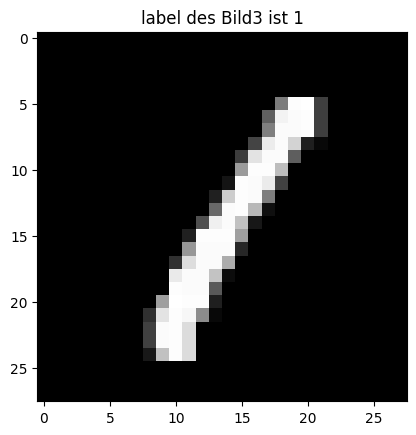

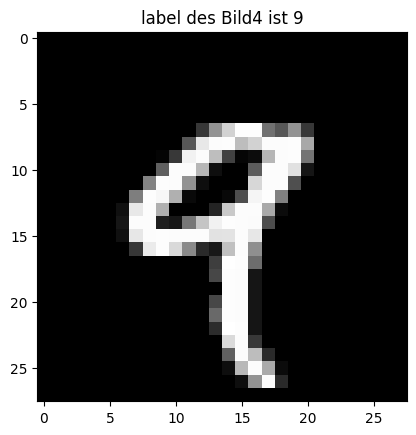

In [9]:
# die Bilder mit Label anzeigen lassen 

for i in range(5):
                    plt.imshow(x_train[i] , cmap="gray")
                    plt.title (f"label des Bild{i} ist {y_train[i]}")
                    plt.show()

In [10]:
# neuronal Netz definieren und trainieren 

modell = tf.keras.Sequential([
                    tf.keras.layers.Flatten(input_shape = (28, 28)), # 2D Bild in 1D umwandeln
                    tf.keras.layers.Dense(128, activation= "relu"),
                    tf.keras.layers.Dense(10)
                           ])

# Optimizer definieren 
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Sprase_categorical_Crossentrope als Verlustfunktion definieren 
loss_fn= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # weil Outputs keine Warhrscheinlichkeiten


modell.compile (
                    optimizer= opt ,
                    loss= loss_fn,
                    metrics= ["accuracy"]
)

modell.fit(x_train, y_train,epochs= 5)

c:\Users\youse\OneDrive\Desktop\YOUSEF_TEST\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9257 - loss: 0.2553
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9675 - loss: 0.1097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9782 - loss: 0.0733
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0561
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0423


In [11]:
modell.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

das Bild ohne ohne  reshape 
  [[0.         0.         0.29803922 0.96862745 0.99215686]
 [0.         0.         0.50196078 0.99215686 0.99215686]
 [0.         0.69019608 0.96470588 0.99215686 0.62352941]
 [0.09803922 0.91764706 0.99215686 0.91372549 0.1372549 ]
 [0.77647059 0.99215686 0.99215686 0.55294118 0.        ]] 
 das Bild mit reshape 
 [[0.         0.         0.29803922 0.96862745 0.99215686]
 [0.         0.         0.50196078 0.99215686 0.99215686]
 [0.         0.69019608 0.96470588 0.99215686 0.62352941]
 [0.09803922 0.91764706 0.99215686 0.91372549 0.1372549 ]
 [0.77647059 0.99215686 0.99215686 0.55294118 0.        ]]
Vorhesage als Rohwerte LogitS : 
 [[ -2.2775717    1.5872921   12.460726     0.82854635 -19.93303
   -5.101635    -4.063168   -18.813007    -2.608582   -11.895192  ]]
Type der Prediction ist 
 <class 'numpy.ndarray'>
[ -2.2775717    1.5872921   12.460726     0.82854635 -19.93303
  -5.101635    -4.063168   -18.813007    -2.608582   -11.895192  ]
[[3.9739851e-07

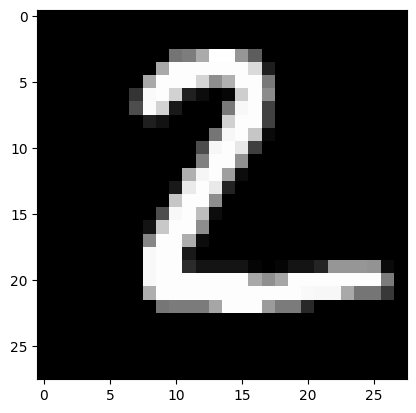

In [12]:
# zeigen des erste Bild 
index = 1
first_bild = x_test[index]
print(f"das Bild ohne ohne  reshape \n  {first_bild[10:15 , 10:15]} ")

re_first_bild = first_bild.reshape(28,28)
print (f" das Bild mit reshape \n {re_first_bild[10:15 , 10:15]}")

plt.imshow(re_first_bild, cmap="gray")
plt.show 

# da das Modell auch die Batchgröße erweitrt müssen wir ein Dimension 
imag = tf.expand_dims(re_first_bild, axis=0)
prdict1 = modell(imag).numpy()
print("Vorhesage als Rohwerte LogitS : \n", prdict1)
print("Type der Prediction ist \n", type(prdict1))

print (tf.squeeze(prdict1).numpy())


# Vorhersage als Wahrscheinlichkeiten 
predict2 = tf.math.softmax(prdict1).numpy()
print(predict2)

# zusätzliche Deminsionen beseitigen 
predict3 = tf.squeeze(predict2).numpy()
print(" Prediktion als Wahr \n",predict3)
print(type(predict3))

# Inder der vorhersagte Klasse 
final_prediction = tf.math.argmax(predict3).numpy()
print("die vorhersagte Klasse : ",final_prediction)


print ("die echte Klasse ist : " , y_test[1])

In [13]:
# Reminder 
l = [10, 2, 32, 69,15,96]
print(l)
print(type(l))
list = np.array(l)
print(type(list))
print(list)
print(list.shape)

print (list.reshape(2,3))

[10, 2, 32, 69, 15, 96]
<class 'list'>
<class 'numpy.ndarray'>
[10  2 32 69 15 96]
(6,)
[[10  2 32]
 [69 15 96]]


# Loss_Funktion in NN:
## categorical_crossentropy müssen Klassen-Labels codiert sein(Hund [0,0,1])
## sparse categorical_crossentropy -<Klassen_Labels sind Integer  ganzzahligen Zielen>
## binary_crossentropy für binäre Klassifikation

## Neuronal Netz erweitern 

In [14]:
import tensorflow as tf 
from numpy.random import seed 

# wir nutzen tf.random.seed()  zur Reproduktion 

seed(1)
tf.random.set_seed(2)


# Neuronal Netz definieren 

model = tf.keras.Sequential([
                    tf.keras.layers.Flatten(input_shape=(28,28)),
                    tf.keras.layers.Dense(128, activation="relu"),
                    tf.keras.layers.Dense(100, activation="relu"),
                    tf.keras.layers.Dense(10)

                       ])

model.compile(
                    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics = ["accuracy"]
)


model.fit(x_train, y_train, epochs=5 , batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9287 - loss: 0.2386 - val_accuracy: 0.9527 - val_loss: 0.1643
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9573 - loss: 0.1484 - val_accuracy: 0.9586 - val_loss: 0.1541
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9636 - loss: 0.1309 - val_accuracy: 0.9551 - val_loss: 0.1848
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9656 - loss: 0.1284 - val_accuracy: 0.9639 - val_loss: 0.1573
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9719 - loss: 0.1054 - val_accuracy: 0.9647 - val_loss: 0.1538


(28, 28)
[[0.         0.         0.29803922 0.96862745 0.99215686 0.90588235]
 [0.         0.         0.50196078 0.99215686 0.99215686 0.56470588]
 [0.         0.69019608 0.96470588 0.99215686 0.62352941 0.04705882]
 [0.09803922 0.91764706 0.99215686 0.91372549 0.1372549  0.        ]
 [0.77647059 0.99215686 0.99215686 0.55294118 0.         0.        ]
 [0.97254902 0.99215686 0.74117647 0.04705882 0.         0.        ]]


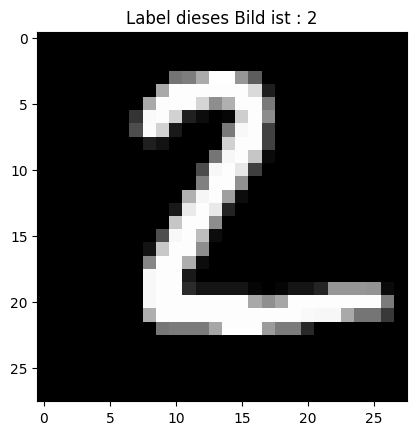

In [15]:
# Predction 

import matplotlib.pyplot as plt 
import numpy as np 


plt.imshow(x_test[1], cmap="gray")
plt.title(f"Label dieses Bild ist : {y_test[1]}")

print( x_train[1].shape)
print(x_test[1][10:16 , 10:16])

In [16]:
x = tf.expand_dims(x_test[1] , axis=0).numpy()

In [17]:
x.shape

(1, 28, 28)

In [18]:
print(x)

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.45490196 0.490

In [19]:
pre1= model(x).numpy()
print(pre1)

[[  0.54885167   5.1000614   24.875841     0.2261967  -11.617828
   -4.9728527   -5.1746635    0.39706257  -7.41233    -12.817989  ]]


In [20]:
probs = tf.math.softmax(pre1).numpy()
print(probs)

[[2.7222152e-11 2.5792180e-09 1.0000000e+00 1.9714935e-11 1.4157989e-16
  1.0886217e-13 8.8967557e-14 2.3388449e-11 9.4934936e-15 4.2636019e-17]]


In [21]:
print(f"die vorhesagte Klassse ist {np.argmax(probs) } und der echte Klasse ist {y_test[1]}")

die vorhesagte Klassse ist 2 und der echte Klasse ist 2


In [22]:
loss , accuracy = model.evaluate(x_test,y_test)

print("Accuarcy des Modells ist: \n", accuracy)
print("loss ist: \n", loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.1538
Accuarcy des Modells ist: 
 0.9646999835968018
loss ist: 
 0.15382617712020874


In [23]:
print(model.evaluate(x_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.1538
[0.15382617712020874, 0.9646999835968018]


In [24]:
x2= x_test[1]

In [25]:
print(x2.shape)

(28, 28)


In [26]:
print(type(x2))

<class 'numpy.ndarray'>


In [27]:
img = x2.reshape((28,28,1))

In [28]:
print(img.shape)

(28, 28, 1)


In [29]:
s = tf.image.random_crop(value=img, size=(23,23,1)).numpy()

# Bild Augmentieren  risize_crop_or_pad(value, hight_target, width_target)

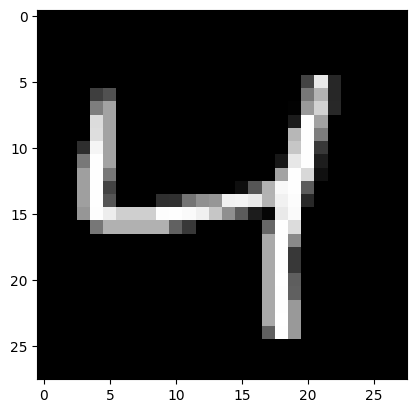

In [30]:
bild = x_train[2]
bild_ = bild.reshape((28,28,1))
bild_.shape
plt.imshow(bild_, cmap="gray")

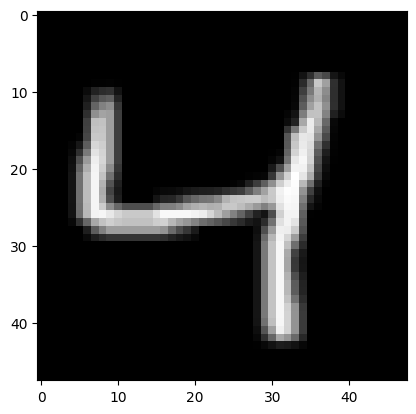

In [31]:
# 1- das Bild mit padding vergrößeren 

bild_groß = tf.image.resize_with_pad(bild_, 48,48)

plt.imshow(bild_groß, cmap="gray")

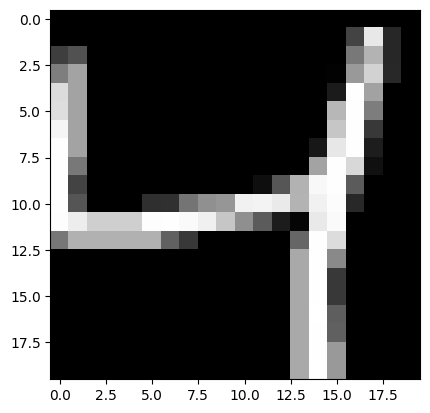

In [32]:
# 2- das bild mit cropping kleiner machen 

bild_klein = tf.image.resize_with_crop_or_pad(bild_, 20,20)
plt.imshow(bild_klein, cmap="gray")

# das Bild zufällig zuschneiden mit tf.image.random_crop()

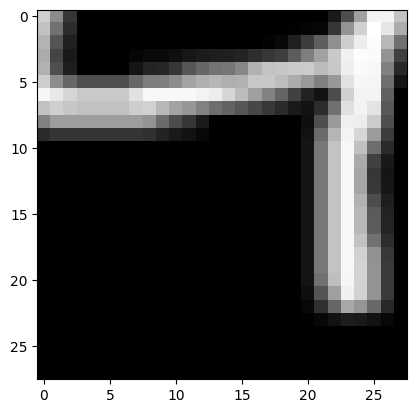

In [33]:
bild_keiner = tf.image.random_crop(bild_groß, size=[28,28,1])
plt.imshow(bild_keiner, cmap="gray")

In [34]:
ima = x_train[2]

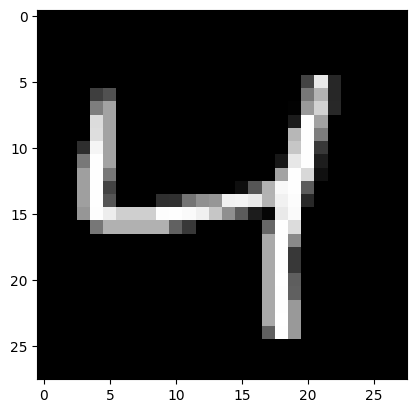

In [35]:
plt.imshow(ima, cmap="gray")

In [36]:
print(ima.shape)

(28, 28)


# Warum CNN besser als NNs?

In [106]:
def augmentaion(x):
                    x= np.array(x).reshape(28,28,1)
                    x = tf.image.resize_with_crop_or_pad(x, target_height=36, target_width=36)
                    x = tf.image.random_crop(value=x , size=[28,28,1])
                    return x 

# Missklassifizierung 

<function matplotlib.pyplot.show(close=None, block=None)>

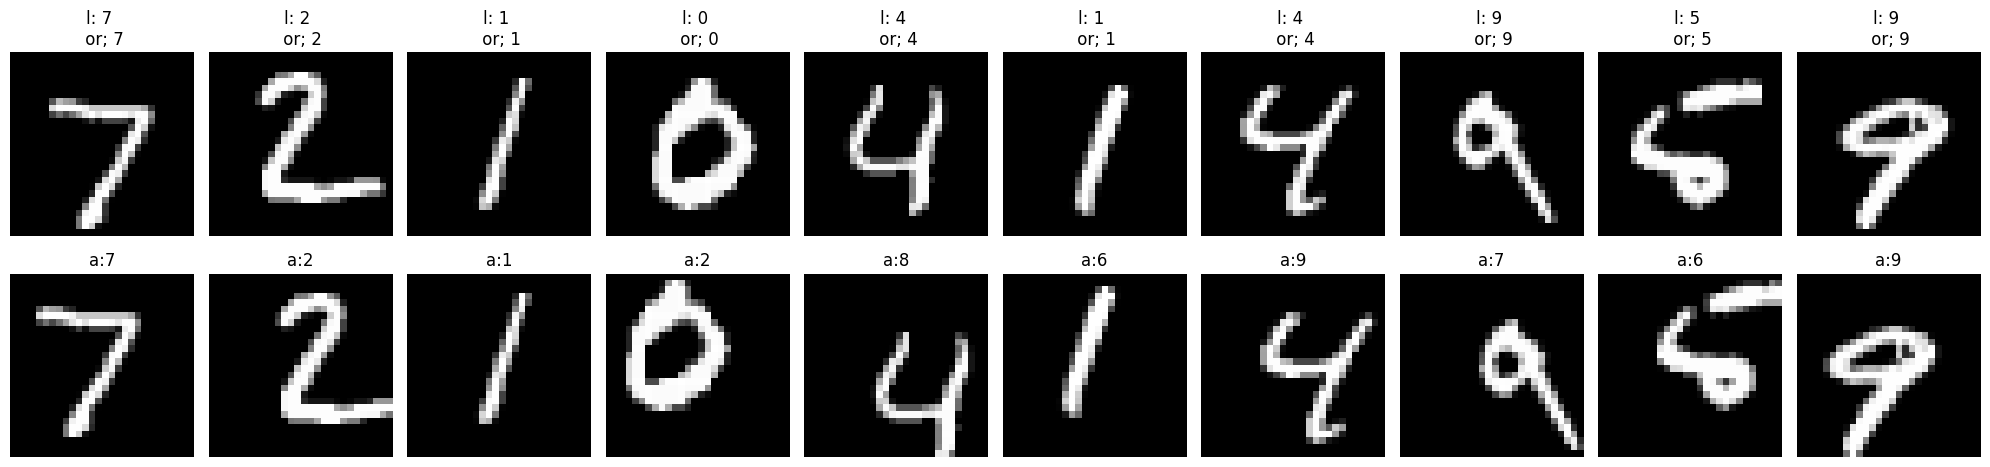

In [132]:
num_img = 10
plt.figure(figsize=(2*num_img,5))



for i in range(num_img):
                    orginal_bild = x_test[i]
                    orginal_pixel = orginal_bild.reshape(28,28)

                    # Vorhersage für unverändertes Bild 
                    orig_pred_logits = model(tf.expand_dims(orginal_bild, axis=0))
                    orig_pred_probs = tf.nn.softmax(orig_pred_logits).numpy()
                    orginal_pred = np.argmax(orig_pred_probs)


                   # Augmentierung bzw. Verschiebung 
                    aug_im = augmentaion(orginal_bild)
                    aug_pixel = np.array(aug_im).reshape(28,28)

                  # Vorhersage für die verschiebenen Bilder 
                    aug_pred_logits = model(tf.expand_dims(aug_im, axis=0))
                    aug_pred_probs= tf.nn.softmax(aug_pred_logits).numpy()
                    aug_pred = np.argmax(aug_pred_probs)

                    # plot für unveränderte bilder 
                    plt.subplot(2, num_img , i+1)
                    plt.imshow(orginal_pixel, cmap= "gray")
                    plt.title(f"l: {y_test[i]} \n or; {orginal_pred}")
                    plt.axis("off")
                    
                    # plot für verschiebenne Bilder 
                    plt.subplot(2, num_img, num_img+i+1 )
                    plt.imshow(aug_pixel , cmap = "gray")
                    plt.title(f"a:{aug_pred}")
                    plt.axis("off")


plt.tight_layout()
plt.show




In [142]:
# Güte des Modell 

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy des Modell auf Testdaten{accuracy}")

augmented_x_test = np.array([tf.squeeze(augmentaion(x)) for x in x_test])
loss, accuracy = model.evaluate(augmented_x_test, y_test)
accuracy


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9647 - loss: 0.1538
Accuracy des Modell auf Testdaten0.9646999835968018
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4461 - loss: 5.2501


0.44609999656677246

## NNs sind nicht translationsinvariant deswegen wird CNNs benutzt 